In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\\restart\mdwarf_cut.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_26656\2537354226.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\\restart\mdwarf_cut.csv")


In [18]:
df['EPIC_ID'][0] = int(df['EPIC_ID'][0])

C:\Users\thoma\AppData\Local\Temp\ipykernel_12120\2992954052.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['EPIC_ID'][0] = int(df['EPIC_ID'][0])
C:\Users\thoma\AppData\Local\Temp\ipykernel_12120\2992954052.py:1: SettingWithCopyWarni

In [20]:
flc = from_mast("246848915", mode="LC", mission="K2")

8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


In [4]:
flc = flc[flc['flux'] != 0]

In [21]:
flc = flc.detrend("k2sc")

Only KeplerTargetPixelFile derived FlareLightCurves can be passed to K2SC de-trending.
NoneType: None


ValueError: Only KeplerTargetPixelFile derived FlareLightCurves can be passed to K2SC de-trending.

In [6]:
fuck = flc[flc['flux'] <= 0]

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

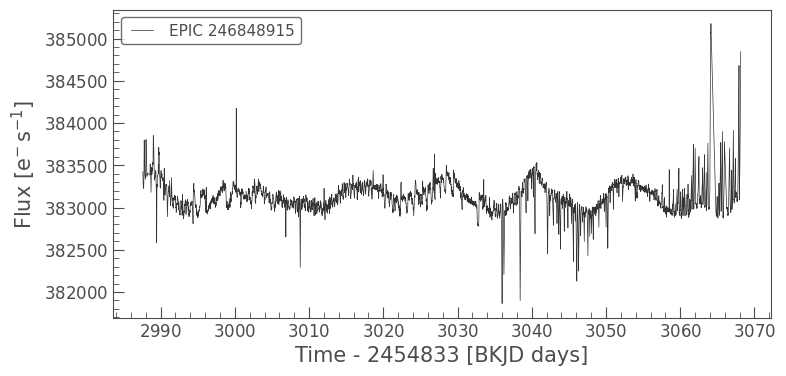

In [17]:
flc.plot()

entry 3498 seems to be where the error arises? - skip this error and add counter for skips; aim for < 100 skips

In [150]:
flc_cut = flc[flc['time'] >= flc['time'][3497]]

In [137]:
flc_again = flc[flc['time'] != flc['time'][3498]]

In [4]:

try:
    flc = flc.detrend('savgol')
except ValueError:
    print("i work!")

i work!


C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


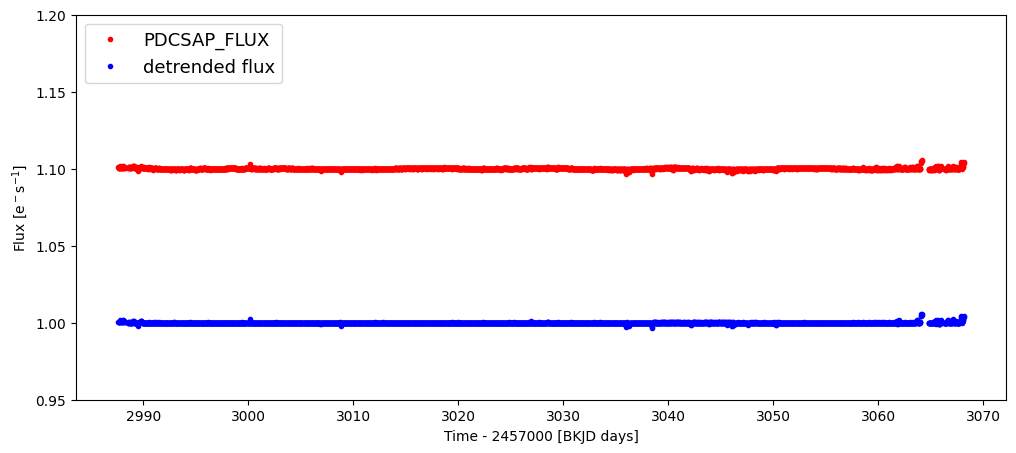

In [18]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux)+0.1, "r.", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
#plt.xlim(3016, 3017)
plt.ylim(.95,1.2)
plt.legend(loc=2,fontsize=13);

In [19]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)
test.flares

Found 2 candidate(s) in the (0,29) gap.
Found 3 candidate(s) in the (29,2334) gap.
Found 0 candidate(s) in the (2334,2679) gap.
Found 4 candidate(s) in the (2679,3472) gap.
Found 2 candidate(s) in the (3472,3525) gap.
Found 3 candidate(s) in the (3525,3607) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,8,13,140888,140893,2987.786033,2987.888195,5.768162148440698,0.16315982302509935,0.0011783838272094727,0.102162,3607.0
1,19,25,140900,140906,2988.031223,2988.153817,7.157537730132855,0.17910415490916576,0.0012018680572509766,0.122595,3607.0
2,46,55,140944,140954,2988.930250,2989.134574,9.659952155115029,0.2206581761480413,0.001127004623413086,0.204324,3607.0
3,78,88,140979,140990,2989.645384,2989.870140,10.326855981610006,0.238403940538651,0.0010416507720947266,0.224756,3607.0
4,1875,1879,142880,142884,3028.486529,3028.568255,3.4964560442974424,0.16248583562275457,0.0006030797958374023,0.081727,3607.0
5,3363,3369,144505,144512,3061.687903,3061.830925,10.624695061738748,0.22214755183703433,0.0013909339904785156,0.143022,3607.0
6,3375,3379,144518,144525,3061.953515,3062.096537,14.558446088014183,0.3297902216515948,0.0015134811401367188,0.143022,3607.0
7,3450,3456,144600,144608,3063.628915,3063.792369,17.334156989476632,0.28191887249075204,0.0018267631530761719,0.163454,3607.0
8,3465,3471,144617,144625,3063.976254,3064.139708,38.20477361594837,0.17371577157153434,0.005367279052734375,0.163454,3607.0
9,3498,3504,144685,144692,3065.365611,3065.508633,12.542877594887024,0.23012132616403225,0.0017015933990478516,0.143022,3607.0


Create conditions within istart and istop, and ampl_rec be above a certain percentage threshold